# Census Income Prediction

# Name: Sourav Saha

# Problem Definition
 - Find out a Dataset, and compare at least two different algorithms and choose the best one
 - Use suitable Data Preprocessing and Feature Selection/Engineering Methods
 - Fine tune the model and hyper parameters and Finalise the Model
 - Make the model deployment-ready by giving User-Input provision

# Objective
 - I choose Adult dataset.
 - The objective of this dataset is to predict whether income exceeds 50,000 dollars per year based on census data. So, we will use the logistic regression and decision tree algorithm to predict if an individual earns more than $50k annually and is therefore elligible for the new credit card. 

# Approach
 - Import all necessry libraries.
 - Works on the dataset.
 - Doing necessary EDA parts for visualizations.
 - Using suitable Data Preprocessing and Feature Selection/Engineering Methods.
 - Using fine tune model and hyperparameter and also using different algorithm like LogisticRegression, DecisionTres, RandomForest, PCA we have to check the best model.
 - After making best model, by giving user input predict the target variable.

# Code

In [135]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.decomposition import PCA
from sklearn import tree
from sklearn.preprocessing import OneHotEncoder

In [136]:
# Loading the dataset
df=pd.read_csv("C:/Users/SOURAV SAHA/adult.csv")
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [137]:
df.tail()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
48841,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [139]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [140]:
print(f'Dataset shape is{df.shape}')

Dataset shape is(48842, 15)


In [141]:
df.isin(['?']).sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [142]:
df.dropna(inplace=True)
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [143]:
df.nunique()

age                   74
workclass              9
fnlwgt             28523
education             16
educational-num       16
marital-status         7
occupation            15
relationship           6
race                   5
gender                 2
capital-gain         123
capital-loss          99
hours-per-week        96
native-country        42
income                 2
dtype: int64

In [144]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

# Value Count Function

In [145]:
df['workclass'].value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [146]:
df['occupation'].value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [147]:
df['native-country'].value_counts()

United-States                 43832
Mexico                          951
?                               857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                        

In [148]:
df['gender'].value_counts()

Male      32650
Female    16192
Name: gender, dtype: int64

In [149]:
df['marital-status'].value_counts()

Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: marital-status, dtype: int64

In [150]:
df['race'].value_counts()

White                 41762
Black                  4685
Asian-Pac-Islander     1519
Amer-Indian-Eskimo      470
Other                   406
Name: race, dtype: int64

In [151]:
df['income'].value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

In [152]:
df['education'].value_counts()

HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64

<AxesSubplot:xlabel='income', ylabel='count'>

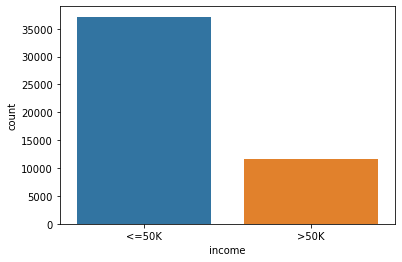

In [153]:
# Is dataset balanced?
sns.countplot(x='income',data=df)

C:\Users\SOURAV SAHA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='income', ylabel='count'>

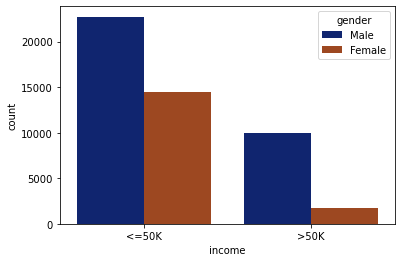

In [154]:
sns.countplot(df['income'],palette='dark',hue='gender',data=df)

 - Females are underrepresented. This could be possibly caused by census bias.

C:\Users\SOURAV SAHA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='income', ylabel='count'>

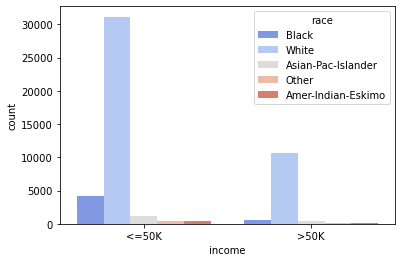

In [155]:
sns.countplot(df['income'],palette='coolwarm',hue='race',data=df)

C:\Users\SOURAV SAHA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='income', ylabel='count'>

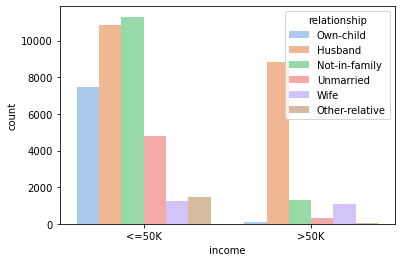

In [156]:
sns.countplot(df['income'],palette='pastel',hue='relationship',data=df)

# Filling ? Values

In [157]:
df['workclass']=df['workclass'].replace('?',"Private")
df['occupation']=df['occupation'].replace('?',"Prof-specialty")
df['native-country']=df['native-country'].replace('?',"United-States")

In [158]:
df.isin(['?']).sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

# Feature Engineering

In [159]:
# education category
df.education=df.education.replace(['Preschool','1st-4th','5th-6th','7th-8th','9th','10th','11th','12th'],'school')
df.education=df.education.replace('HS-grad','high school')
df.education=df.education.replace(['Assoc-voc','Assoc-acdm','Prof-school'],'higher')
df.education=df.education.replace('Bachelors','undergrad')
df.education=df.education.replace('Masters','grad')
df.education=df.education.replace('Doctorate','doc')

In [160]:
# marital status
df['marital-status']=df['marital-status'].replace(['Married-civ-spouse','Married-AF-spouse'],'married')
df['marital-status']=df['marital-status'].replace('Never-married','not-married')
df['marital-status']=df['marital-status'].replace(['Divorced','Separated','Widowed ','Married-spouse-absent'],'other')

In [161]:
# workclass status
df.workclass=df.workclass.replace(['Federal-gov','Local-gov','State-gov'],'government')
df.workclass=df.workclass.replace(['Self-emp-not-inc','Self-emp-inc'],'self-employed')
df.workclass=df.workclass.replace(['Never-worked','Without-pay'],'other')

In [162]:
# occupation status
df.occupation=df.occupation.replace(['Adm-clerical','Exec-managerial'],'white-collar')
df.occupation=df.occupation.replace(['Craft-repair','Farming-fishing','Handlers-cleaners','Machine-op-inspct','Transport-moving'],'blue-collar')
df.occupation=df.occupation.replace(['Other-service','Priv-house-serv','Protective-serv','Tech-support'],'service')
df.occupation=df.occupation.replace('Prof-specialty','professional')
df.occupation=df.occupation.replace('Armed-Forces','other')

In [163]:
# income status
df.income=df.income.replace('<=50K',0)
df.income=df.income.replace('>50K',1)

In [164]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,school,7,not-married,blue-collar,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,high school,9,married,blue-collar,Husband,White,Male,0,0,50,United-States,0
2,28,government,336951,higher,12,married,service,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,married,blue-collar,Husband,Black,Male,7688,0,40,United-States,1
4,18,Private,103497,Some-college,10,not-married,professional,Own-child,White,Female,0,0,30,United-States,0


In [165]:
df['marital-status'].value_counts()

married        22416
not-married    16117
other           8791
Widowed         1518
Name: marital-status, dtype: int64

In [166]:
df['education'].value_counts()

high school     15784
Some-college    10878
undergrad        8025
school           6408
higher           4496
grad             2657
doc               594
Name: education, dtype: int64

In [167]:
df['occupation'].value_counts()

blue-collar     15051
white-collar    11697
professional     8981
service          7594
Sales            5504
other              15
Name: occupation, dtype: int64

In [168]:
df['workclass'].value_counts()

Private          36705
government        6549
self-employed     5557
other               31
Name: workclass, dtype: int64

In [169]:
df.corr()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income
age,1.000000,-0.076628,0.030940,0.077229,0.056944,0.071558,0.230369
fnlwgt,-0.076628,1.000000,-0.038761,-0.003706,-0.004366,-0.013519,-0.006339
educational-num,0.030940,-0.038761,1.000000,0.125146,0.080972,0.143689,0.332613
capital-gain,0.077229,-0.003706,0.125146,1.000000,-0.031441,0.082157,0.223013
capital-loss,0.056944,-0.004366,0.080972,-0.031441,1.000000,0.054467,0.147554
hours-per-week,0.071558,-0.013519,0.143689,0.082157,0.054467,1.000000,0.227687
income,0.230369,-0.006339,0.332613,0.223013,0.147554,0.227687,1.000000


<AxesSubplot:>

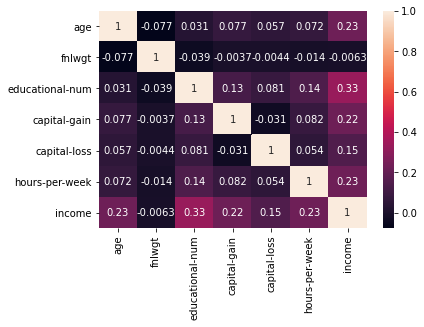

In [170]:
sns.heatmap(df.corr(),annot=True)

C:\Users\SOURAV SAHA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='income', ylabel='count'>

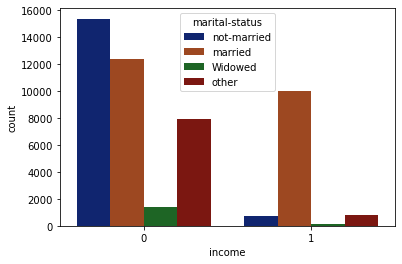

In [171]:
sns.countplot(df['income'],palette='dark',hue='marital-status',data=df)

- For those who are married, nearly half of them are making greater than $50,000 a year.

C:\Users\SOURAV SAHA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='income', ylabel='count'>

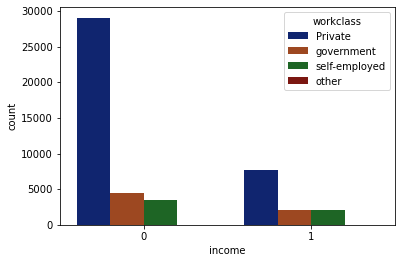

In [172]:
sns.countplot(df['income'],palette='dark',hue='workclass',data=df)

 - Those who are in private have the highest tendency of making greater than $50,000 a year.

C:\Users\SOURAV SAHA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='income', ylabel='count'>

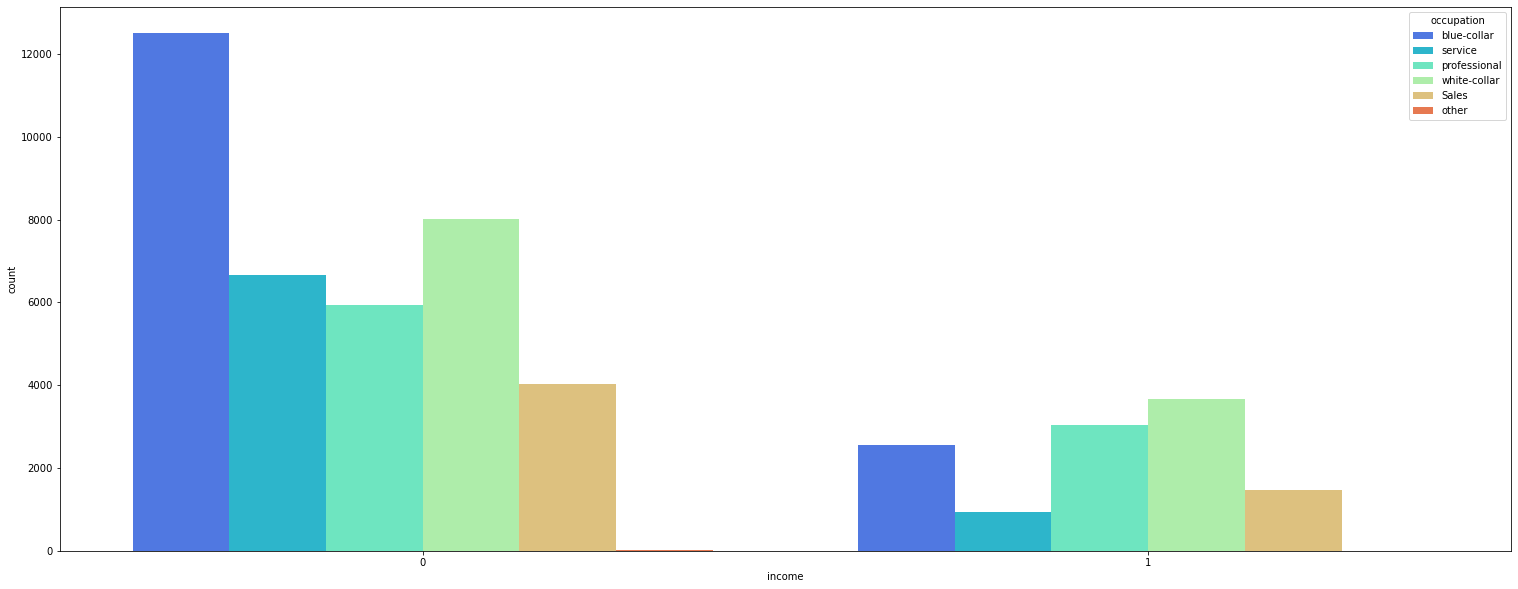

In [173]:
plt.figure(figsize = [26,10])
sns.countplot(df['income'],palette='rainbow',hue='occupation',data=df)

- It is noticed that income varies greatly across different occupations. Nearly half of Professional occupation makes greater than $50,000 a year, while that percentage of Service occupation is very less.

C:\Users\SOURAV SAHA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='education', ylabel='count'>

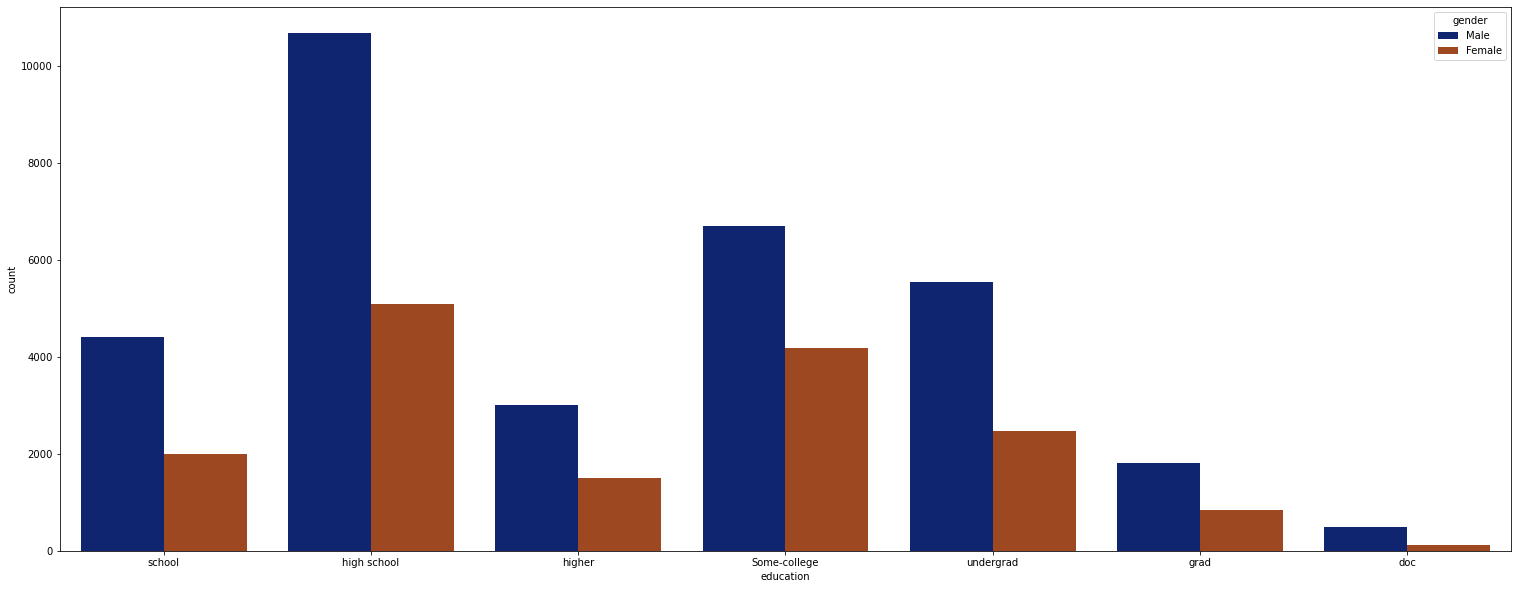

In [174]:
plt.figure(figsize = [26,10])
sns.countplot(df['education'],palette='dark',hue='gender',data=df)

 - It is noticed that boys are enrolled more than girls in education system.

# Histogram

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'fnlwgt'}>,
        <AxesSubplot:title={'center':'educational-num'}>],
       [<AxesSubplot:title={'center':'capital-gain'}>,
        <AxesSubplot:title={'center':'capital-loss'}>,
        <AxesSubplot:title={'center':'hours-per-week'}>],
       [<AxesSubplot:title={'center':'income'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

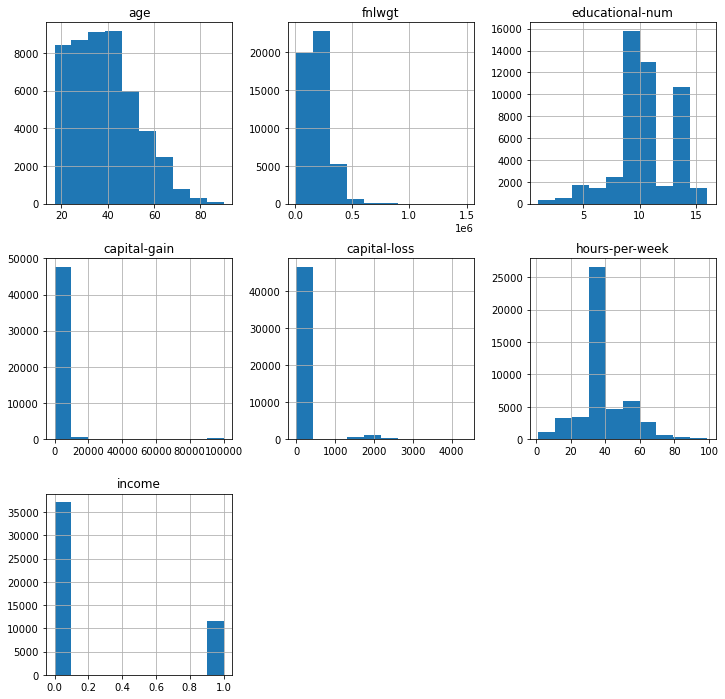

In [175]:
df.hist(figsize=(12,12),layout=(3,3),sharex=False)

# Boxplot

age                   AxesSubplot(0.125,0.657941;0.227941x0.222059)
fnlwgt             AxesSubplot(0.398529,0.657941;0.227941x0.222059)
educational-num    AxesSubplot(0.672059,0.657941;0.227941x0.222059)
capital-gain          AxesSubplot(0.125,0.391471;0.227941x0.222059)
capital-loss       AxesSubplot(0.398529,0.391471;0.227941x0.222059)
hours-per-week     AxesSubplot(0.672059,0.391471;0.227941x0.222059)
income                   AxesSubplot(0.125,0.125;0.227941x0.222059)
dtype: object

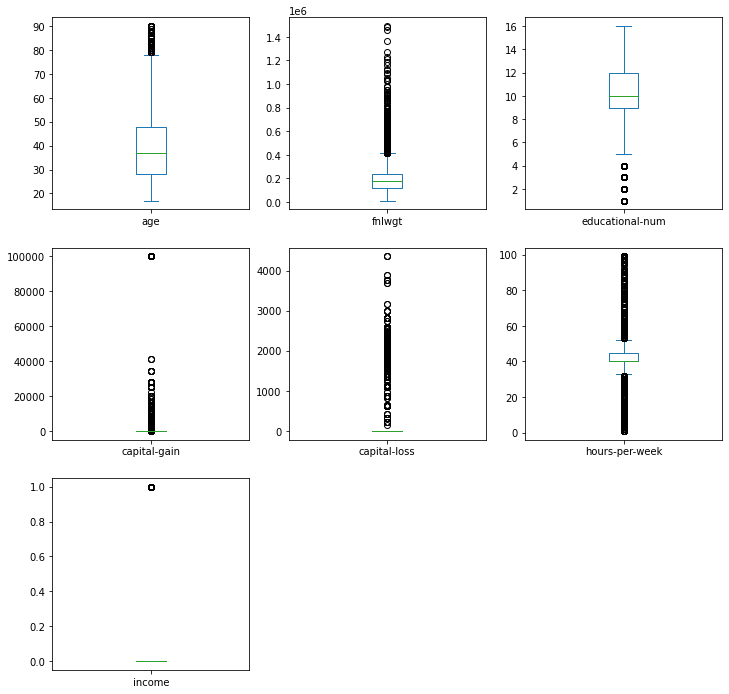

In [176]:
# check outliers
df.plot(kind='box',figsize=(12,12),layout=(3,3),sharex=False,subplots=True)

# Plotly

In [177]:
px.pie(df,values='educational-num',names='education',title='% of edu',color_discrete_sequence=px.colors.qualitative.T10)

- For simplicity of this analysis, the weighting factor is discarded. Educational-num can represent by the highest education level completed. Role in the family can be assessed from gender and marital status. Thus, the following 3 variables are deleted education-num, relationship, and fnlwgt.
- In histoplot observations have zero capital-gain and/or capital-loss. Similarly, there native-country displays high skewness as most observations are from United States. Therefore, these three variables are excluded from the analysis as well.

# Feature Scaling

In [178]:
df1=df.copy()
df1=df1.drop(['educational-num','relationship','fnlwgt','capital-gain','capital-loss','native-country'],axis=1)
df1.head()

,age,workclass,education,marital-status,occupation,race,gender,hours-per-week,income
0,25,Private,school,not-married,blue-collar,Black,Male,40,0
1,38,Private,high school,married,blue-collar,White,Male,50,0
2,28,government,higher,married,service,White,Male,40,1
3,44,Private,Some-college,married,blue-collar,Black,Male,40,1
4,18,Private,Some-college,not-married,professional,White,Female,30,0


In [179]:
int_col = ['age', 'hours-per-week']
def ohe(X):
    encoded_X = pd.get_dummies(X)
    ss = StandardScaler()
    for col in int_col:
        encoded_X[col] = ss.fit_transform(encoded_X[[col]])
    return encoded_X
X_1 = df1.drop('income',axis = 1)
y = df['income']
X = ohe(X_1)

In [180]:
X

,age,hours-per-week,workclass_Private,workclass_government,workclass_other,workclass_self-employed,education_Some-college,education_doc,education_grad,education_high school,...,occupation_professional,occupation_service,occupation_white-collar,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,gender_Female,gender_Male
0,-0.995129,-0.034087,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,-0.046942,0.772930,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
2,-0.776316,-0.034087,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
3,0.390683,-0.034087,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,-1.505691,-0.841104,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,-0.849254,-0.195490,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0
48838,0.098933,-0.034087,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
48839,1.411808,-0.034087,1,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,1,1,0
48840,-1.213941,-1.648120,1,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,1


In [181]:
# Train-Test split: 30% test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# Creating Model

# Logistic Regression

In [182]:
model_name=[]
acc_on_training_data=[]
acc_on_testing_data=[]
acc_score=[]

In [183]:
lr=LogisticRegression()
model=lr.fit(X_train,y_train)
prediction=model.predict(X_test)
print("Accuracy on training data: ",lr.score(X_train,y_train))
print("Accuracy on testing data: ",lr.score(X_test,y_test))

Accuracy on training data:  0.8237737283921729
Accuracy on testing data:  0.8299324370436089


C:\Users\SOURAV SAHA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [184]:
confusion_matrix(y_test,prediction)

array([[10343,   890],
       [ 1602,  1818]], dtype=int64)

In [185]:
print("Accuracy score of that model in LogisticRegression is: ",accuracy_score(y_test,prediction))

Accuracy score of that model in LogisticRegression is:  0.8299324370436089


In [186]:
model_name.append('LogisticRegression')
acc_on_training_data.append(lr.score(X_train,y_train))
acc_on_testing_data.append(lr.score(X_test,y_test))
acc_score.append(accuracy_score(y_test,prediction))

In [187]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.87      0.92      0.89     11233
           1       0.67      0.53      0.59      3420

    accuracy                           0.83     14653
   macro avg       0.77      0.73      0.74     14653
weighted avg       0.82      0.83      0.82     14653



# Random Forest Classifier

In [188]:
rfc=RandomForestClassifier()
model1=rfc.fit(X_train, y_train)
prediction1= model1.predict(X_test)
print("Accuracy on training data: ",rfc.score(X_train,y_train))
print("Accuracy on testing data: ",rfc.score(X_test,y_test))

Accuracy on training data:  0.9434613472169411
Accuracy on testing data:  0.8111649491571692


In [189]:
confusion_matrix(y_test,prediction1)

array([[10003,  1230],
       [ 1537,  1883]], dtype=int64)

In [190]:
print("Accuracy score of that model in RandomForestClassifier is: ",accuracy_score(y_test,prediction1))

Accuracy score of that model in RandomForestClassifier is:  0.8111649491571692


In [191]:
model_name.append('RandomForest_with_no_parameter')
acc_on_training_data.append(rfc.score(X_train,y_train))
acc_on_testing_data.append(rfc.score(X_test,y_test))
acc_score.append(accuracy_score(y_test,prediction1))

In [192]:
print(classification_report(y_test, prediction1))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88     11233
           1       0.60      0.55      0.58      3420

    accuracy                           0.81     14653
   macro avg       0.74      0.72      0.73     14653
weighted avg       0.81      0.81      0.81     14653



- Finding best hyperparameters for Randomforest

In [193]:
params = {'max_depth':[3,5,10,20,None],
       'n_estimators':[10,100,200,300,400,500,1000],
       'max_features':[1,2,3,4,5,6,7],
       'criterion':['gini','entropy'],
       'bootstrap':[True, False],
       'min_samples_leaf':[1,2,3,4],
         }

In [194]:
random_search = RandomizedSearchCV(rfc, param_distributions = params, 
                                   scoring = 'roc_auc', n_jobs = 1, verbose = 0, 
                                   random_state = None)
random_search.fit(X_train, y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(), n_jobs=1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 5, 10, 20, None],
                                        'max_features': [1, 2, 3, 4, 5, 6, 7],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'n_estimators': [10, 100, 200, 300, 400,
                                                         500, 1000]},
                   scoring='roc_auc')

In [195]:
random_search.best_params_

{'n_estimators': 500,
 'min_samples_leaf': 4,
 'max_features': 4,
 'max_depth': 10,
 'criterion': 'gini',
 'bootstrap': True}

In [196]:
random_search.best_estimator_

RandomForestClassifier(max_depth=10, max_features=4, min_samples_leaf=4,
                       n_estimators=500)

In [197]:
rfc1= RandomForestClassifier(n_estimators=500, min_samples_leaf=4,
                                        max_features=4, max_depth= 10,
                                        criterion= 'gini', bootstrap= True, 
                                       random_state = 42)
model2=rfc1.fit(X_train, y_train)
prediction2=model2.predict(X_test)
print("Accuracy on training data: ",rfc1.score(X_train,y_train))
print("Accuracy on testing data: ",rfc1.score(X_test,y_test))
print("Accuracy score of that model in RandomForestClassifier is: ",accuracy_score(y_test,prediction2))

Accuracy on training data:  0.836760361519787
Accuracy on testing data:  0.8379171500716577
Accuracy score of that model in RandomForestClassifier is:  0.8379171500716577


In [198]:
model_name.append('RandomForest_with_gini_best_hyperparameter')
acc_on_training_data.append(rfc1.score(X_train,y_train))
acc_on_testing_data.append(rfc1.score(X_test,y_test))
acc_score.append(accuracy_score(y_test,prediction2))

In [199]:
confusion_matrix(y_test,prediction2)

array([[10551,   682],
       [ 1693,  1727]], dtype=int64)

In [200]:
print(classification_report(y_test, prediction2))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90     11233
           1       0.72      0.50      0.59      3420

    accuracy                           0.84     14653
   macro avg       0.79      0.72      0.75     14653
weighted avg       0.83      0.84      0.83     14653



# Decision Trees

In [201]:
dtc= DecisionTreeClassifier(max_depth = 10, random_state = 42, max_features = 3, 
                               min_samples_leaf = 1,
                              criterion = 'gini')
model3=dtc.fit(X_train, y_train)
prediction3= model3.predict(X_test)
print("Accuracy on training data: ",dtc.score(X_train,y_train))
print("Accuracy on testing data: ",dtc.score(X_test,y_test))

Accuracy on training data:  0.8216677878849923
Accuracy on testing data:  0.8207193066266294


In [202]:
print("Accuracy score of that model in DecisionTreeClassifier is: ",accuracy_score(y_test,prediction3))

Accuracy score of that model in DecisionTreeClassifier is:  0.8207193066266294


In [203]:
model_name.append('DecisionTree_with_gini')
acc_on_training_data.append(dtc.score(X_train,y_train))
acc_on_testing_data.append(dtc.score(X_test,y_test))
acc_score.append(accuracy_score(y_test,prediction3))

In [204]:
confusion_matrix(y_test,prediction3)

array([[10445,   788],
       [ 1839,  1581]], dtype=int64)

In [205]:
print(classification_report(y_test, prediction3))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89     11233
           1       0.67      0.46      0.55      3420

    accuracy                           0.82     14653
   macro avg       0.76      0.70      0.72     14653
weighted avg       0.81      0.82      0.81     14653



In [206]:
dtc1= DecisionTreeClassifier(max_depth = 10, random_state = 42, max_features = 3, 
                               min_samples_leaf = 1,
                              criterion = 'entropy')
model4=dtc1.fit(X_train, y_train)
prediction4= model4.predict(X_test)
print("Accuracy on training data: ",dtc1.score(X_train,y_train))
print("Accuracy on testing data: ",dtc1.score(X_test,y_test))

Accuracy on training data:  0.8225452630963175
Accuracy on testing data:  0.8229714051730022


In [207]:
print("Accuracy score of that model in DecisionTreeClassifier is: ",accuracy_score(y_test,prediction4))
confusion_matrix(y_test,prediction4)

Accuracy score of that model in DecisionTreeClassifier is:  0.8229714051730022


array([[10445,   788],
       [ 1806,  1614]], dtype=int64)

In [208]:
model_name.append('DecisionTree_with_entropy')
acc_on_training_data.append(dtc1.score(X_train,y_train))
acc_on_testing_data.append(dtc1.score(X_test,y_test))
acc_score.append(accuracy_score(y_test,prediction4))

In [209]:
print(classification_report(y_test, prediction4))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89     11233
           1       0.67      0.47      0.55      3420

    accuracy                           0.82     14653
   macro avg       0.76      0.70      0.72     14653
weighted avg       0.81      0.82      0.81     14653



# PCA

In [210]:
principal_component_analysis = PCA(n_components = 3)
results = principal_component_analysis.fit(X)
results_transformed = results.transform(X)

In [211]:
results_transformed

array([[-0.94195372, -0.78747964, -0.61261714],
       [ 0.76833002, -0.72033101, -0.73669631],
       [-0.17422268, -0.43178987, -0.48523876],
       ...,
       [ 0.7024919 ,  1.14284828,  1.13957119],
       [-1.95711315,  0.29498477, -0.73653879],
       [ 0.82255604,  0.85005804,  0.74318954]])

In [212]:
pca_dataframe = pd.DataFrame(data = results_transformed)
pca_dataframe

,0,1,2
0,-0.941954,-0.787480,-0.612617
1,0.768330,-0.720331,-0.736696
2,-0.174223,-0.431790,-0.485239
3,0.475935,0.167999,-0.703365
4,-2.105242,-0.239027,0.466533
...,...,...,...
48837,-0.763269,-0.188797,0.358534
48838,0.406718,-0.031070,-0.973836
48839,0.702492,1.142848,1.139571
48840,-1.957113,0.294985,-0.736539


In [213]:
# PCA with DecisionTree
dtc2=DecisionTreeClassifier()
X_train, X_test, y_train, y_test = train_test_split(pca_dataframe,y)
model5=dtc2.fit(X_train, y_train)
prediction5= model5.predict(X_test)
print("Accuracy on training data: ",dtc2.score(X_train,y_train))
print("Accuracy on testing data: ",dtc2.score(X_test,y_test))
print("Accuracy score of that model in DecisionTreeClassifier using PCA is: ",accuracy_score(y_test,prediction5))

Accuracy on training data:  0.9420982228167399
Accuracy on testing data:  0.7642289738760134
Accuracy score of that model in DecisionTreeClassifier using PCA is:  0.7642289738760134


In [214]:
model_name.append('DecisionTree_with_PCA')
acc_on_training_data.append(dtc2.score(X_train,y_train))
acc_on_testing_data.append(dtc2.score(X_test,y_test))
acc_score.append(accuracy_score(y_test,prediction5))

In [217]:
# PCA with RandomForest
rfc2=RandomForestClassifier(n_estimators=500, min_samples_leaf=4,
                                        max_features=3, max_depth= 10,
                                        criterion= 'gini', bootstrap= True, 
                                       random_state = 42)
X_train, X_test, y_train, y_test = train_test_split(pca_dataframe,y)
model6=rfc2.fit(X_train, y_train)
prediction6= model6.predict(X_test)
print("Accuracy on training data: ",rfc2.score(X_train,y_train))
print("Accuracy on testing data: ",rfc2.score(X_test,y_test))
print("Accuracy score of that model in RandomForestClassifier using PCA is: ",accuracy_score(y_test,prediction6))

Accuracy on training data:  0.8228276596325517
Accuracy on testing data:  0.8059945950372615
Accuracy score of that model in RandomForestClassifier using PCA is:  0.8059945950372615


In [218]:
model_name.append('RandomForest_with_PCA')
acc_on_training_data.append(rfc2.score(X_train,y_train))
acc_on_testing_data.append(rfc2.score(X_test,y_test))
acc_score.append(accuracy_score(y_test,prediction6))

In [219]:
df2=pd.DataFrame({'model name':model_name, 'accuracy on training data':acc_on_training_data, 'accuracy on testing data':acc_on_testing_data, 'accuracy score':acc_score})
df2

,model name,accuracy on training data,accuracy on testing data,accuracy score
0,LogisticRegression,0.823774,0.829932,0.829932
1,RandomForest_with_no_parameter,0.943461,0.811165,0.811165
2,RandomForest_with_gini_best_hyperparameter,0.836760,0.837917,0.837917
3,DecisionTree_with_gini,0.821668,0.820719,0.820719
4,DecisionTree_with_entropy,0.822545,0.822971,0.822971
5,DecisionTree_with_PCA,0.942098,0.764229,0.764229
6,RandomForest_with_PCA,0.822828,0.805995,0.805995


 - **So, here we can see that in above 7 models, RandomForest_with_gini_best_hyperparameter gives us best accuracy that is 83.63%. Thus We can take this model for our prediction**

# User-Input and Prediction

In [129]:
X_1 = df1.drop('income',axis = 1)

In [221]:
n = int(input('number of inputs : '))
inps = list()
for i in range(n):
    temp = list()
    for col in X_1.columns:
        if col in int_col:
            temp.append(int(input(f'value of {col} column is : ')))
        else:
            i = 1
            for opt in range(len(df1[col].unique())):
                print(f'{i}. {df1[col].unique()[i-1]}')
                i+=1
            opt_t = int(input(f'value of {col} column is : '))
            temp.append(df1[col].unique()[opt_t-1])
    inps.append(temp)

number of inputs : 2
value of age column is : 25
1. Private
2. government
3. self-employed
4. other
value of workclass column is : 2
1. school
2. high school
3. higher
4. Some-college
5. undergrad
6. grad
7. doc
value of education column is : 6
1. not-married
2. married
3. Widowed
4. other
value of marital-status column is : 1
1. blue-collar
2. service
3. professional
4. white-collar
5. Sales
6. other
value of occupation column is : 3
1. Black
2. White
3. Asian-Pac-Islander
4. Other
5. Amer-Indian-Eskimo
value of race column is : 1
1. Male
2. Female
value of gender column is : 2
value of hours-per-week column is : 50
value of age column is : 44
1. Private
2. government
3. self-employed
4. other
value of workclass column is : 1
1. school
2. high school
3. higher
4. Some-college
5. undergrad
6. grad
7. doc
value of education column is : 4
1. not-married
2. married
3. Widowed
4. other
value of marital-status column is : 2
1. blue-collar
2. service
3. professional
4. white-collar
5. Sales


In [222]:
temp_df=pd.DataFrame(inps,columns=X_1.columns)
X_1=pd.concat([X_1,temp_df],ignore_index=True)
X_2 = ohe(X_1)
trainx = X_2[:-n]
testx = X_2[-n:]

In [223]:
temp_df

,age,workclass,education,marital-status,occupation,race,gender,hours-per-week
0,25,government,grad,not-married,professional,Black,Female,50
1,44,Private,Some-college,married,blue-collar,Black,Male,40


In [225]:
testx

,age,hours-per-week,workclass_Private,workclass_government,workclass_other,workclass_self-employed,education_Some-college,education_doc,education_grad,education_high school,...,occupation_professional,occupation_service,occupation_white-collar,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,gender_Female,gender_Male
48842,-0.995125,0.772926,0,1,0,0,0,0,1,0,...,1,0,0,0,0,1,0,0,1,0
48843,0.390699,-0.034103,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [227]:
rfc1= RandomForestClassifier(n_estimators=500, min_samples_leaf=4,
                                        max_features=4, max_depth= 10,
                                        criterion= 'gini', bootstrap= True, 
                                       random_state = 42)
model2=rfc1.fit(trainx, y)
prediction7=model2.predict(testx)

In [228]:
prediction7

array([0, 0], dtype=int64)

In [229]:
df3=X_1[-n:]
df3

,age,workclass,education,marital-status,occupation,race,gender,hours-per-week
48842,25,government,grad,not-married,professional,Black,Female,50
48843,44,Private,Some-college,married,blue-collar,Black,Male,40


In [231]:
df3['income']=prediction7
df3

<ipython-input-231-7229da9f85ce>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,age,workclass,education,marital-status,occupation,race,gender,hours-per-week,income
48842,25,government,grad,not-married,professional,Black,Female,50,0
48843,44,Private,Some-college,married,blue-collar,Black,Male,40,0


In [232]:
df3.income=df3.income.replace(0,'<=50K')
df3.income=df3.income.replace(1,'>50K')
df3

<ipython-input-232-3c38c74bdcba>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-232-3c38c74bdcba>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,age,workclass,education,marital-status,occupation,race,gender,hours-per-week,income
48842,25,government,grad,not-married,professional,Black,Female,50,<=50K
48843,44,Private,Some-college,married,blue-collar,Black,Male,40,<=50K


# Conclusion
 - So we can conclude that this dataset is inbalanced.